In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6095

Best Fitness:	1400.1976
Solution:	1400.0000
Diff:		0.1976

[0:10:11][----------] 1.96% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5601

Best Fitness:	1400.1571
Solution:	1400.0000
Diff:		0.1571

[0:19:49][----------] 3.92% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5822

Best Fitness:	1400.1438
Solution:	1400.0000
Diff:		0.1438

[0:29:23][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5818

Best Fitness:	1400.1510
Solution:	1400.0000
Diff:		0.1510

[0:39:01][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5442

Best Fitness:	1400.1285
Solution:	1400.0000
Diff:		0.1285

[0:47:22][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5615

Best Fitness:	1400.1391
Solution:	1400.0000
Diff:		0.1391

[0:55:46][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5724

Best Fitness:	1400.1563
Solution:	1400.0000
Diff:		0.1563

[1:04:02][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5967

Best Fitness:	1400.1081
Solution:	1400.0000
Diff:		0.1081

[1:12:39][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5595

Best Fitness:	1400.2083
Solution:	1400.0000
Diff:		0.2083

[1:20:39][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5859

Best Fitness:	1400.2049
Solution:	1400.0000
Diff:		0.2049

[1:29:00][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5901

Best Fitness:	1400.1133
Solution:	1400.0000
Diff:		0.1133

[1:36:48][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5972

Best Fitness:	1400.1975
Solution:	1400.0000
Diff:		0.1975

[1:43:50][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5822

Best Fitness:	1400.1267
Solution:	1400.0000
Diff:		0.1267

[1:50:56][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6018

Best Fitness:	1400.1532
Solution:	1400.0000
Diff:		0.1532

[1:57:57][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5874

Best Fitness:	1400.2619
Solution:	1400.0000
Diff:		0.2619

[2:05:01][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5508

Best Fitness:	1400.1727
Solution:	1400.0000
Diff:		0.1727

[2:12:11][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5436

Best Fitness:	1400.1660
Solution:	1400.0000
Diff:		0.1660

[2:19:19][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5983

Best Fitness:	1400.1669
Solution:	1400.0000
Diff:		0.1669

[2:25:51][####------] 35.29% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5953

Best Fitness:	1400.1540
Solution:	1400.0000
Diff:		0.1540

[2:31:49][####------] 37.25% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5671

Best Fitness:	1400.1461
Solution:	1400.0000
Diff:		0.1461

[2:38:03][####------] 39.22% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5684

Best Fitness:	1400.2567
Solution:	1400.0000
Diff:		0.2567

[2:44:17][####------] 41.18% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5788

Best Fitness:	1400.1705
Solution:	1400.0000
Diff:		0.1705

[2:50:31][####------] 43.14% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6229

Best Fitness:	1400.1728
Solution:	1400.0000
Diff:		0.1728

[2:56:31][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5708

Best Fitness:	1400.1530
Solution:	1400.0000
Diff:		0.1530

[3:02:28][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5554

Best Fitness:	1400.1621
Solution:	1400.0000
Diff:		0.1621

[3:07:55][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5739

Best Fitness:	1400.1293
Solution:	1400.0000
Diff:		0.1293

[3:13:18][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5852

Best Fitness:	1400.2085
Solution:	1400.0000
Diff:		0.2085

[3:18:30][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5925

Best Fitness:	1400.1959
Solution:	1400.0000
Diff:		0.1959

[3:23:48][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5966

Best Fitness:	1400.1920
Solution:	1400.0000
Diff:		0.1920

[3:29:01][######----] 56.86% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5513

Best Fitness:	1400.1398
Solution:	1400.0000
Diff:		0.1398

[3:34:14][######----] 58.82% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5633

Best Fitness:	1400.1552
Solution:	1400.0000
Diff:		0.1552

[3:39:23][######----] 60.78% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6343

Best Fitness:	1400.1185
Solution:	1400.0000
Diff:		0.1185

[3:43:46][######----] 62.75% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6115

Best Fitness:	1400.1115
Solution:	1400.0000
Diff:		0.1115

[3:48:10][######----] 64.71% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5864

Best Fitness:	1400.1563
Solution:	1400.0000
Diff:		0.1563

[3:52:30][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5806

Best Fitness:	1400.1876
Solution:	1400.0000
Diff:		0.1876

[3:56:52][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6309

Best Fitness:	1400.1424
Solution:	1400.0000
Diff:		0.1424

[4:01:11][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6004

Best Fitness:	1400.1589
Solution:	1400.0000
Diff:		0.1589

[4:05:32][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5946

Best Fitness:	1400.1342
Solution:	1400.0000
Diff:		0.1342

[4:09:35][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5969

Best Fitness:	1400.1554
Solution:	1400.0000
Diff:		0.1554

[4:13:06][########--] 76.47% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5419

Best Fitness:	1400.1625
Solution:	1400.0000
Diff:		0.1625

[4:16:36][########--] 78.43% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5728

Best Fitness:	1400.1771
Solution:	1400.0000
Diff:		0.1771

[4:20:06][########--] 80.39% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5508

Best Fitness:	1400.1210
Solution:	1400.0000
Diff:		0.1210

[4:23:33][########--] 82.35% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5680

Best Fitness:	1400.1655
Solution:	1400.0000
Diff:		0.1655

[4:26:58][########--] 84.31% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5736

Best Fitness:	1400.0878
Solution:	1400.0000
Diff:		0.0878

[4:30:25][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5209

Best Fitness:	1400.1318
Solution:	1400.0000
Diff:		0.1318

[4:33:23][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5718

Best Fitness:	1400.1098
Solution:	1400.0000
Diff:		0.1098

[4:36:06][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6121

Best Fitness:	1400.2023
Solution:	1400.0000
Diff:		0.2023

[4:38:47][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.6014

Best Fitness:	1400.1667
Solution:	1400.0000
Diff:		0.1667

[4:41:34][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5617

Best Fitness:	1400.0623
Solution:	1400.0000
Diff:		0.0623

[4:44:17][##########] 96.08% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5756

Best Fitness:	1400.2101
Solution:	1400.0000
Diff:		0.2101

[4:46:58][##########] 98.04% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	1400.5969

Best Fitness:	1400.1934
Solution:	1400.0000
Diff:		0.1934

[4:49:47][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:49:47

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
259,0.847189,0.86163,0.58459,0.916832,0.224014,0.350917,0.552338,0.514279,0.673611,0.788655,...,0.745007,0.411873,0.44134,1.109881,0.320894,0.539147,0.658948,0.294677,0.97043,50
260,0.847189,0.86163,0.58459,0.916832,0.224014,0.350917,0.552338,0.514279,0.673611,0.788655,...,0.745007,0.411873,0.44134,1.109881,0.320894,0.539147,0.658948,0.294677,0.97043,50
261,0.847189,0.86163,0.58459,0.916832,0.224014,0.350917,0.552338,0.514279,0.673611,0.788655,...,0.745007,0.411873,0.44134,1.109881,0.320894,0.539147,0.658948,0.294677,0.97043,50
262,0.847189,0.86163,0.58459,0.916832,0.224014,0.350917,0.552338,0.514279,0.673611,0.788655,...,0.745007,0.411873,0.44134,1.109881,0.320894,0.539147,0.658948,0.294677,0.97043,50
263,0.847189,0.86163,0.58459,0.916832,0.224014,0.350917,0.552338,0.514279,0.673611,0.788655,...,0.745007,0.411873,0.44134,1.109881,0.320894,0.539147,0.658948,0.294677,0.97043,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.1976432971637223

Best error for run 1: 0.1570601310463644

Best error for run 2: 0.14382003809168964

Best error for run 3: 0.1509741656273036

Best error for run 4: 0.12850304216340191

Best error for run 5: 0.13907944335619504

Best error for run 6: 0.15628562024835446

Best error for run 7: 0.10811942380337314

Best error for run 8: 0.20829982087821008

Best error for run 9: 0.20486459758103592

Best error for run 10: 0.11328183297496253

Best error for run 11: 0.19753487563275485

Best error for run 12: 0.12670488826165638

Best error for run 13: 0.15316143589211606

Best error for run 14: 0.26186290426653613

Best error for run 15: 0.1726512143329728

Best error for run 16: 0.16601482390933597

Best error for run 17: 0.16694883531545202

Best error for run 18: 0.1540159576732094

Best error for run 19: 0.14613646570273886

Best error for run 20: 0.2567497552279292

Best error for run 21: 0.1705085363064427

Best error for run 22: 0.17284748960491925

Best error for run 23: 0.1529915979258476

Best error for run 24: 0.162131275557158

Best error for run 25: 0.129327099243028

Best error for run 26: 0.20850406380918685

Best error for run 27: 0.19592998369603265

Best error for run 28: 0.19204374946502867

Best error for run 29: 0.1398302989741751

Best error for run 30: 0.1551962227185868

Best error for run 31: 0.11850584346439064

Best error for run 32: 0.1114670901813497

Best error for run 33: 0.15628951257644985

Best error for run 34: 0.18756482400249297

Best error for run 35: 0.1424461618694295

Best error for run 36: 0.15887478553622714

Best error for run 37: 0.13421611970966296

Best error for run 38: 0.1554387845810652

Best error for run 39: 0.16254902432478957

Best error for run 40: 0.17705773816896908

Best error for run 41: 0.12099087646743101

Best error for run 42: 0.16547020070447616

Best error for run 43: 0.0877982540305311

Best error for run 44: 0.13179874467937225

Best error for run 45: 0.10979395370031853

Best error for run 46: 0.20234603711310228

Best error for run 47: 0.1667105995552447

Best error for run 48: 0.062299143237623866

Best error for run 49: 0.21010065562563796

Best error for run 50: 0.19342191262489905

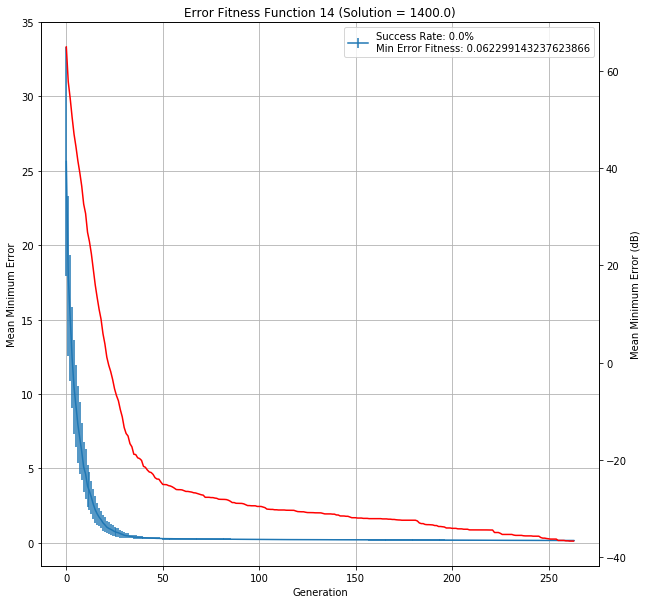

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.8,0.197643,0.15706,0.14382,0.150974,0.128503,0.139079,...,0.131799,0.109794,0.202346,0.166711,0.062299,0.210101,0.193422,0.159689,4:49:47,79800
